## Project - Bank Churn Prediction

### Problem statement

#### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

#### Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

#### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


#### Data Dictionary:

<ul>
    <li> RowNumber: Row number. </li>
    <li> CustomerId: Unique identification key for different customers. </li>
    <li> Surname: Surname of the customer </li>
    <li> Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest. </li>
    <li> Geography: The country to which the customer belongs. </li>
    <li> Gender: The gender of the customer. </li>
    <li> Age: Age of the customer. </li>
    <li> Tenure: The period of time a customer has been associated with the bank. </li>
    <li> Balance: The account balance (the amount of money deposited in the bank account) of the customer. </li>
    <li> NumOfProducts: How many accounts, bank account affiliated products the person has. </li>
    <li> HasCrCard: Does the customer have a credit card through the bank? </li>
    <li> IsActiveMember: Subjective, but for the concept </li>
    <li> EstimatedSalary: Estimated salary of the customer. </li>
    <li> Exited: Did they leave the bank after all? </li>
</ul>

#### 1. Import the necessary packages

In [34]:
# Load Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset into dataframes

In [36]:
bank_df = pd.read_csv("bank.csv")
bank_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [37]:
bank_df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Apply info, shape, describe, and find the number of missing values in the data

In [38]:
# Check to see the number of records in the dataset
bank_df.shape

(10000, 14)

#### Observation: The dataset comprises of 10000 rows and 14 columns

In [39]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations:

<ul>
    <li>All the columns of the dataset have the same number of non-null values</li>
    <li>Some columns are of data type integer and some (categorical features) are of the data type object</li>
    <li>Numerical attributes - RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, EstimatedSalary</li>
    <li>Categorical attributes - Surname, Gender, Geography, NumOfProducts</li>
    <li>Boolean attributes - HasCrCard, IsActiveMember, Exited</li>
</ul>

In [40]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [41]:
# Check to see if data has any missing values
bank_df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### Observation: No Null Values are present

In [42]:
# Check the unique values in each column of the dataframe
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [43]:
# Dropping irrelevant columns
bank_df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [44]:
bank_df.shape

(10000, 11)

In [45]:
print(bank_df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [46]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Attribute:  CreditScore
[{'mean': 650.5288, 'iqr': 134.0, 'cilo': 649.8962, 'cihi': 654.1038, 'whishi': 850, 'whislo': 383, 'fliers': array([376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382,
       373, 350]), 'q1': 584.0, 'med': 652.0, 'q3': 718.0}]


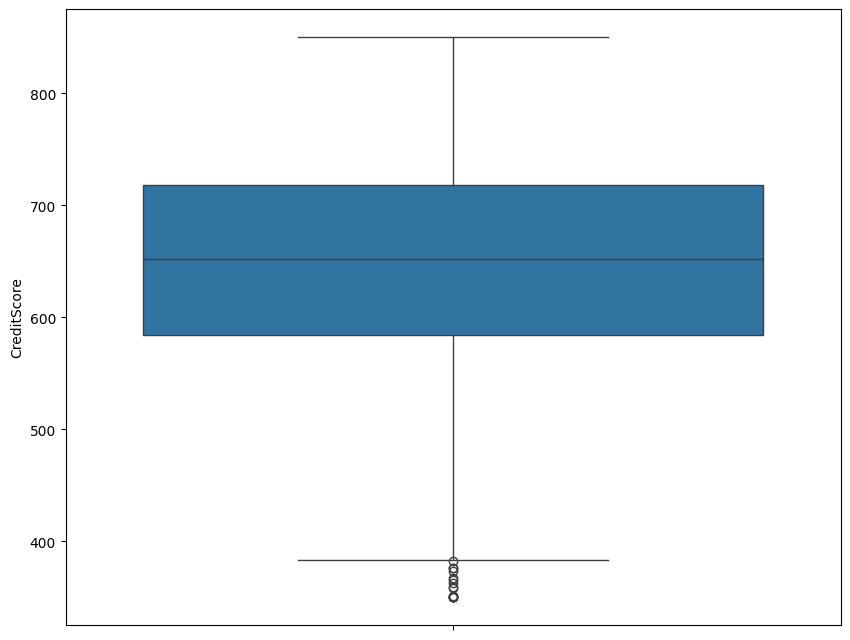

-------------------------------------------------------------------------
Attribute:  Age
[{'mean': 38.9218, 'iqr': 12.0, 'cilo': 36.8116, 'cihi': 37.1884, 'whishi': 62, 'whislo': 18, 'fliers': array([66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72,
       64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70,
       71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66,
       64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63,
       70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72,
       71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63,
       71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68,
       66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63,
       70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75,
       68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78,
       65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 6

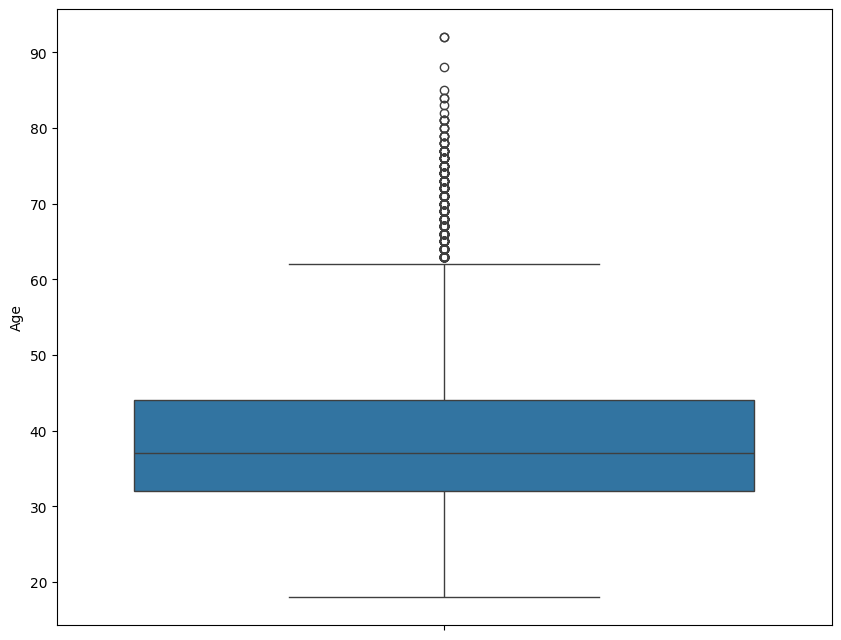

-------------------------------------------------------------------------
Attribute:  Tenure
[{'mean': 5.0128, 'iqr': 4.0, 'cilo': 4.9372, 'cihi': 5.0628, 'whishi': 10, 'whislo': 0, 'fliers': array([], dtype=int64), 'q1': 3.0, 'med': 5.0, 'q3': 7.0}]


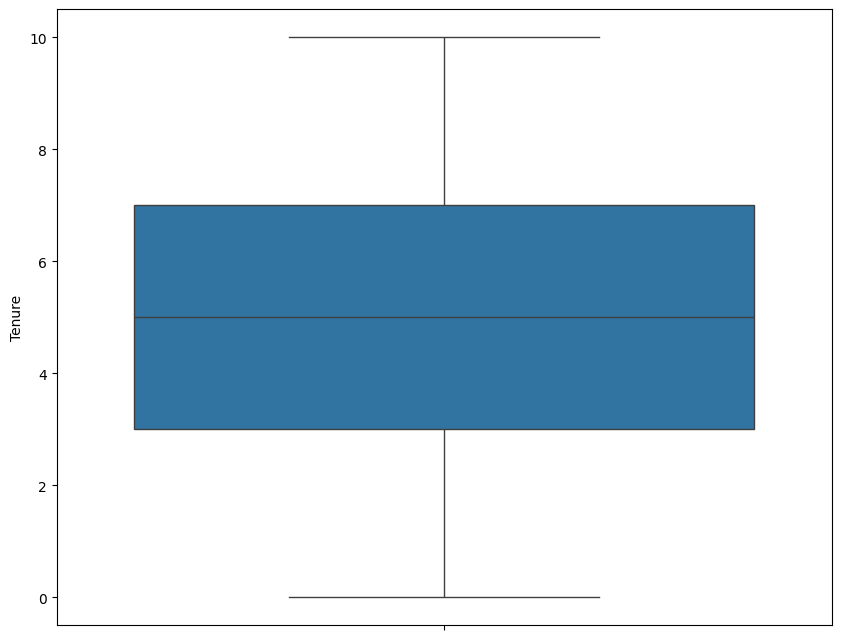

-------------------------------------------------------------------------
Attribute:  Balance
[{'mean': 76485.889288, 'iqr': 127644.24, 'cilo': 95194.52543200001, 'cihi': 99202.554568, 'whishi': 250898.09, 'whislo': 0.0, 'fliers': array([], dtype=float64), 'q1': 0.0, 'med': 97198.54000000001, 'q3': 127644.24}]


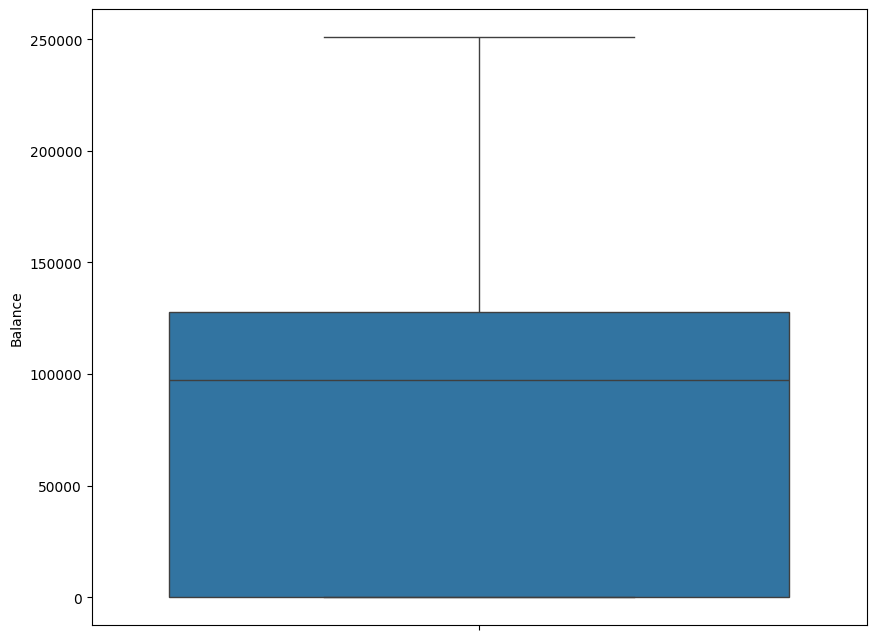

-------------------------------------------------------------------------
Attribute:  EstimatedSalary
[{'mean': 100090.239881, 'iqr': 98386.1375, 'cilo': 98649.25264124999, 'cihi': 101738.57735875, 'whishi': 199992.48, 'whislo': 11.58, 'fliers': array([], dtype=float64), 'q1': 51002.11, 'med': 100193.915, 'q3': 149388.2475}]


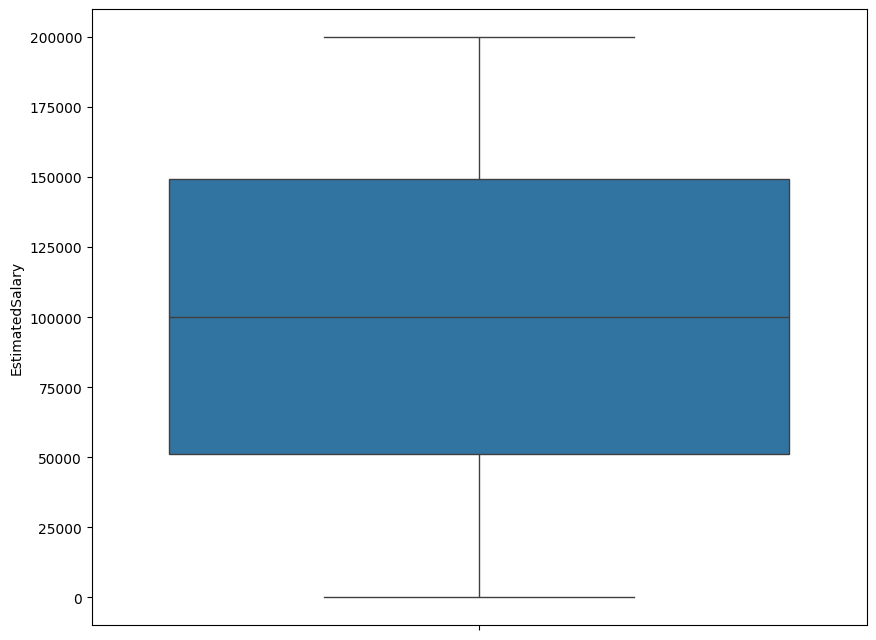

-------------------------------------------------------------------------


In [47]:
from matplotlib.cbook import boxplot_stats

# Central tendency distribution
i = 1
for col in num_cols:
    print('Attribute: ',col)
    print(boxplot_stats(bank_df[col]))
    plt.figure(figsize=(10,8))
    sns.boxplot(bank_df[col])
    plt.show();
    i = i+1
    print('-------------------------------------------------------------------------')

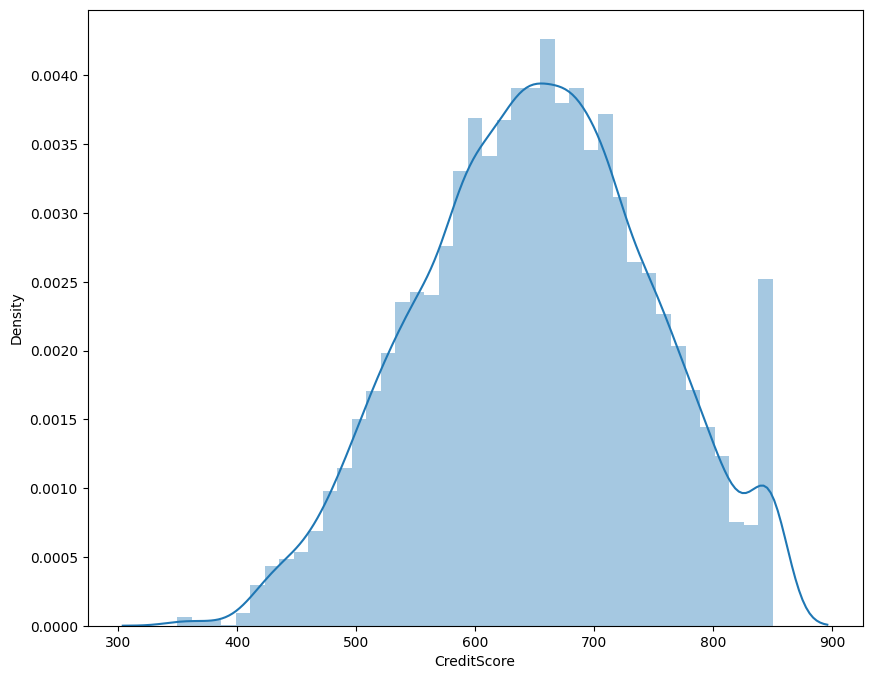

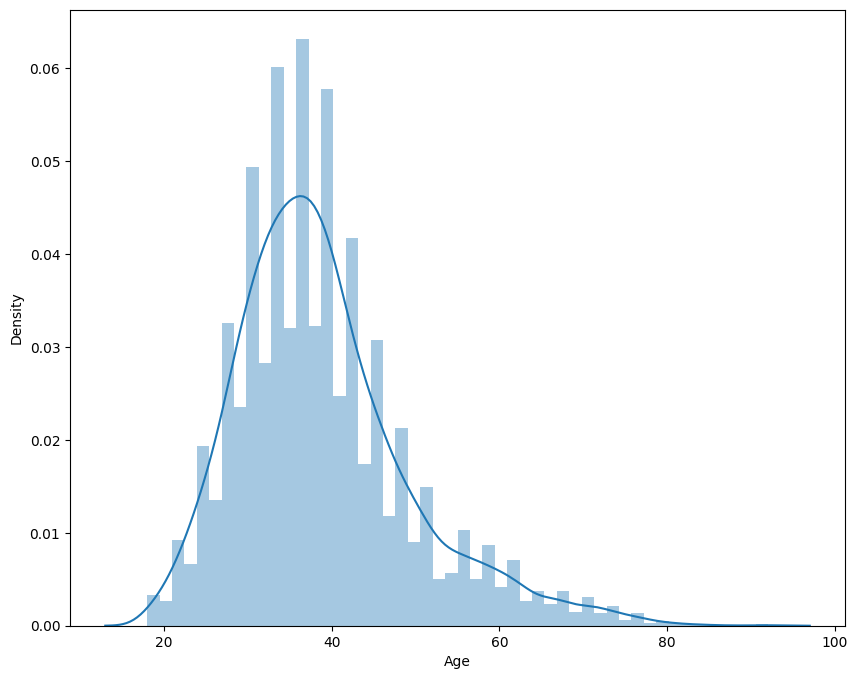

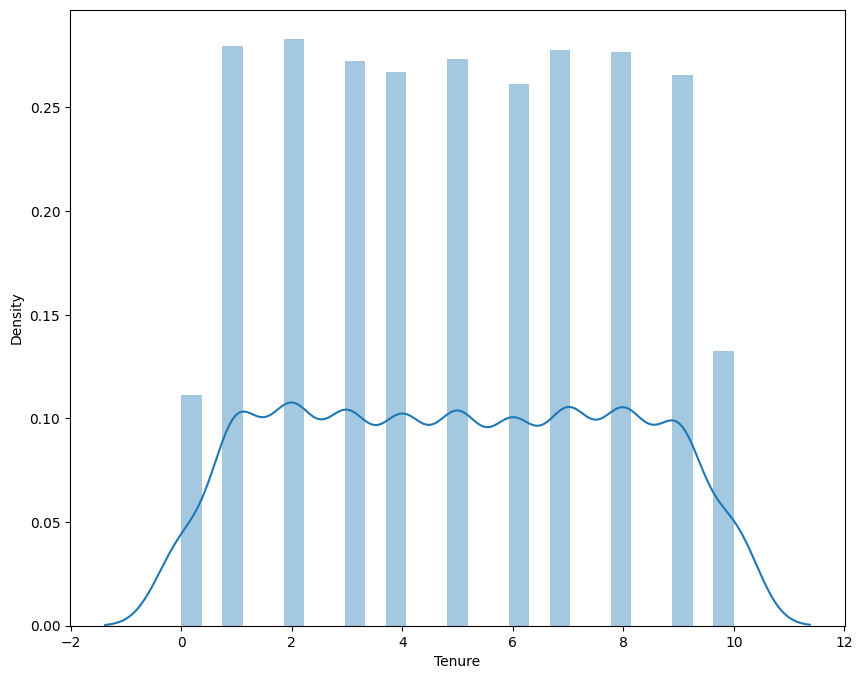

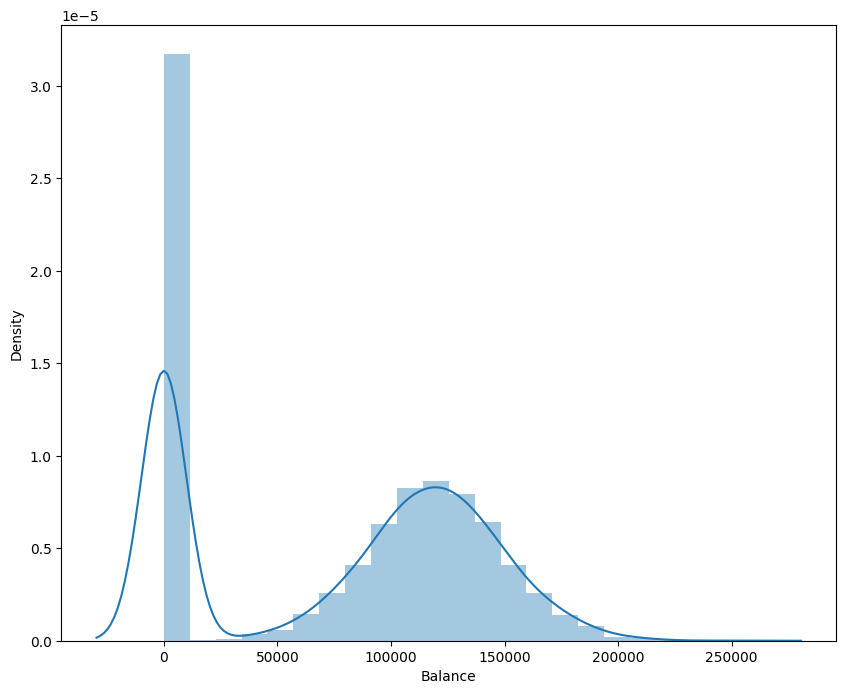

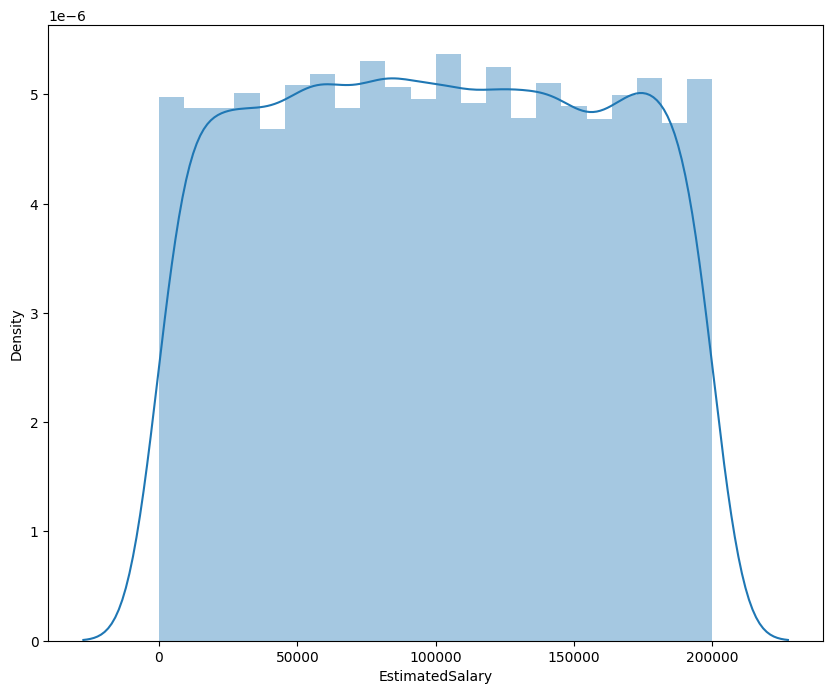

In [48]:
# Skewness distribution
i = 1
for col in num_cols:
    plt.figure(figsize=(10,8))
    sns.distplot(bank_df[col])
    i = i+1

### Encoding categorical variables

In [49]:
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
bank_df['Gender']=labelencoder_X.fit_transform(bank_df['Gender'])
bank_df['Geography']=labelencoder_X.fit_transform(bank_df['Geography'])

In [50]:
bank_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [51]:
# Analyze the distribution of the dataset
bank_df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


### Distribution of Target variable

In [53]:
bank_df.Exited.nunique()

2

In [54]:
bank_df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

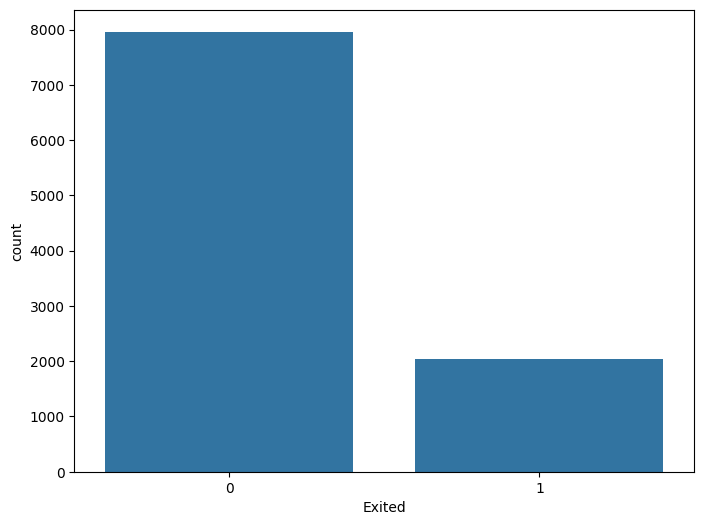

In [56]:
# Plot the distribution of the target attribute
plt.figure(figsize=(8,6))
sns.countplot(x="Exited", data=bank_df);
plt.show()

### Bivariate Analysis

#### Categorical Independent Variables vs Target Variable

In [57]:
cat_cols = ['Gender', 'Geography', 'NumOfProducts']

Exited         0         1
Gender                    
0       0.749285  0.250715
1       0.835441  0.164559


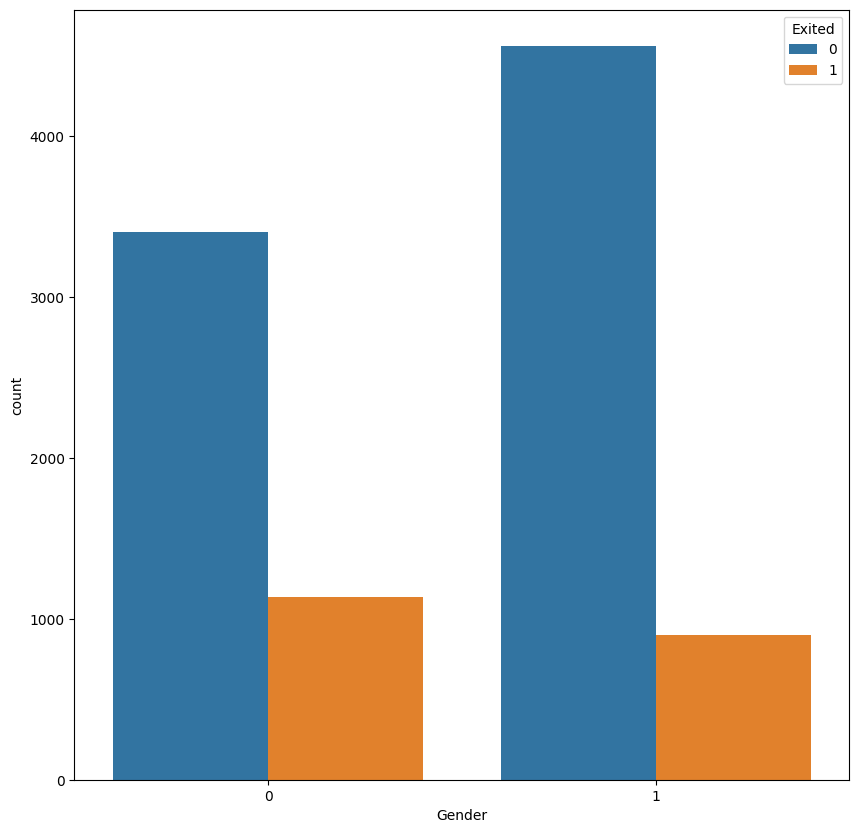

------------------------------------------------------------------------------------------------
Exited            0         1
Geography                    
0          0.838452  0.161548
1          0.675568  0.324432
2          0.833266  0.166734


<Figure size 640x480 with 0 Axes>

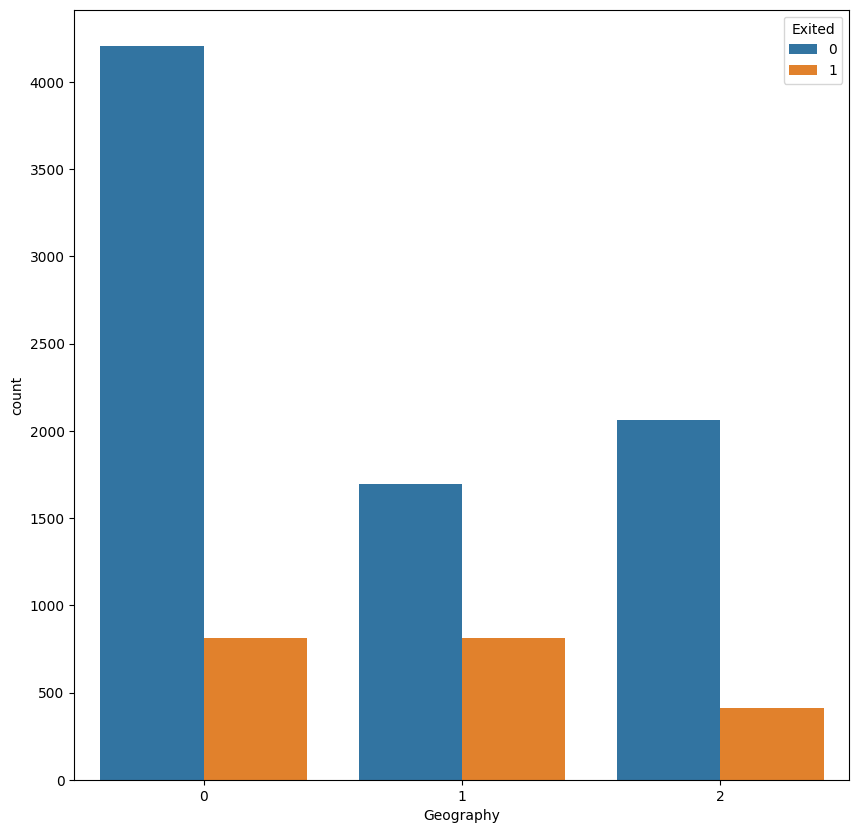

------------------------------------------------------------------------------------------------
Exited                0         1
NumOfProducts                    
1              0.722856  0.277144
2              0.924183  0.075817
3              0.172932  0.827068
4              0.000000  1.000000


<Figure size 640x480 with 0 Axes>

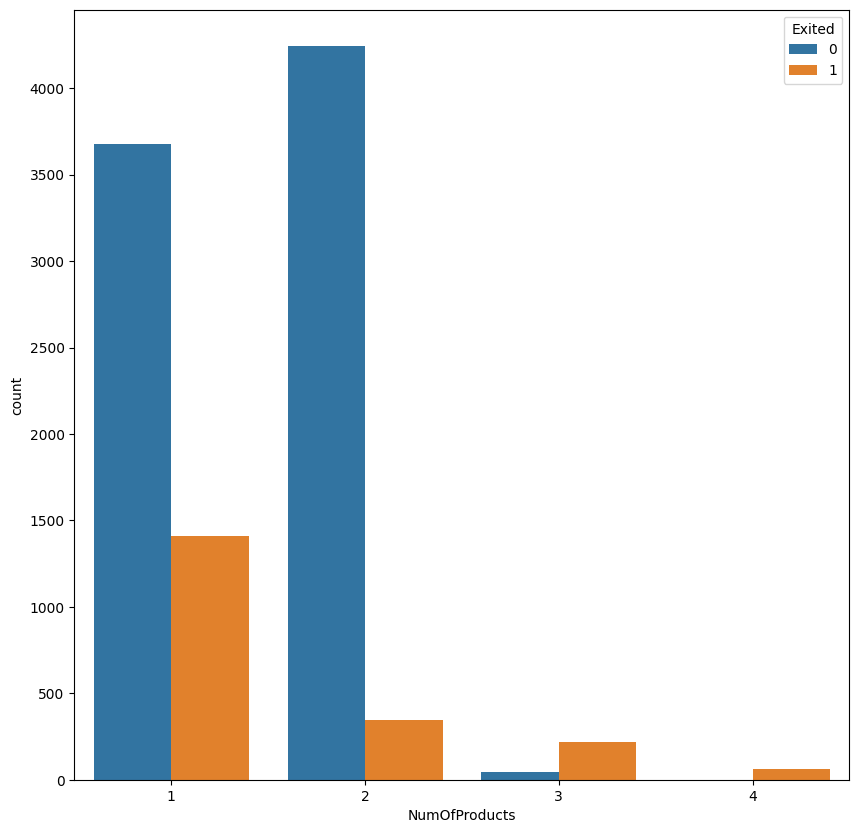

------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [58]:
i = 1
for col in cat_cols:
    plt.figure(figsize=(10,10))
    print(pd.crosstab(bank_df[col],bank_df['Exited'],normalize='index'))
    sns.countplot(x=col, data=bank_df,hue="Exited");
    plt.show()
    plt.tight_layout()
    i = i+1
    print('------------------------------------------------------------------------------------------------')

#### Numerical Independent Variables vs Target Variable

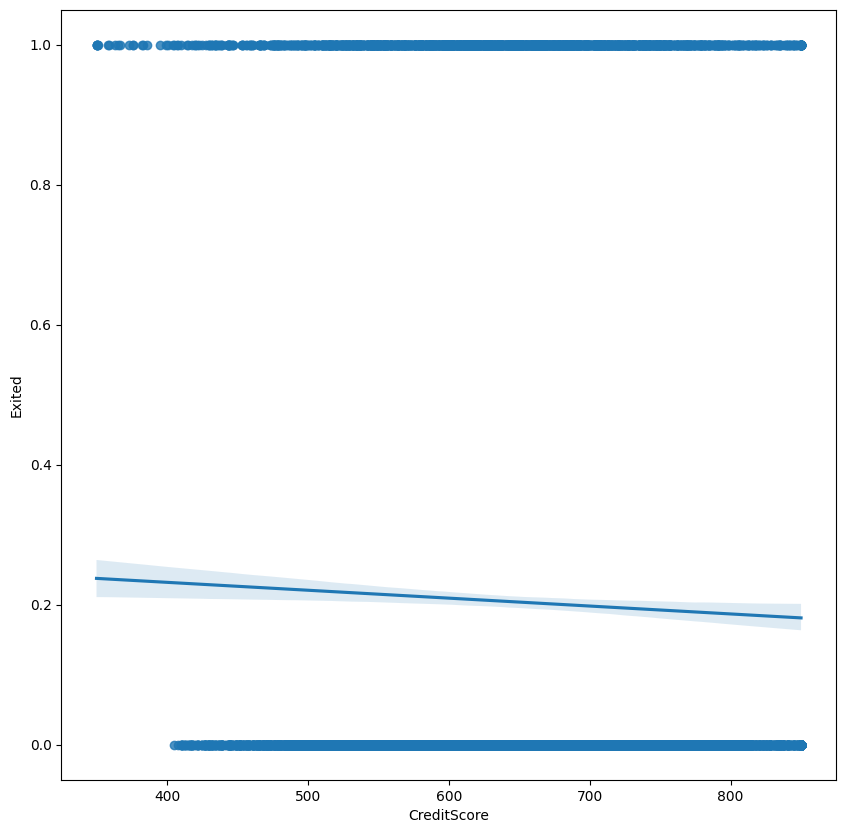

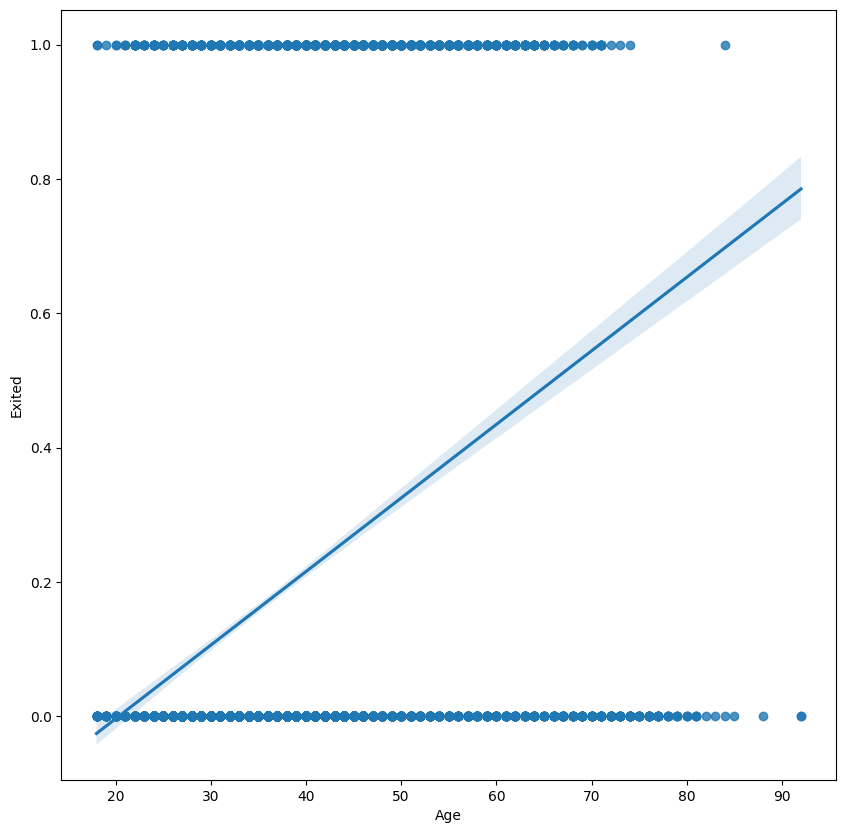

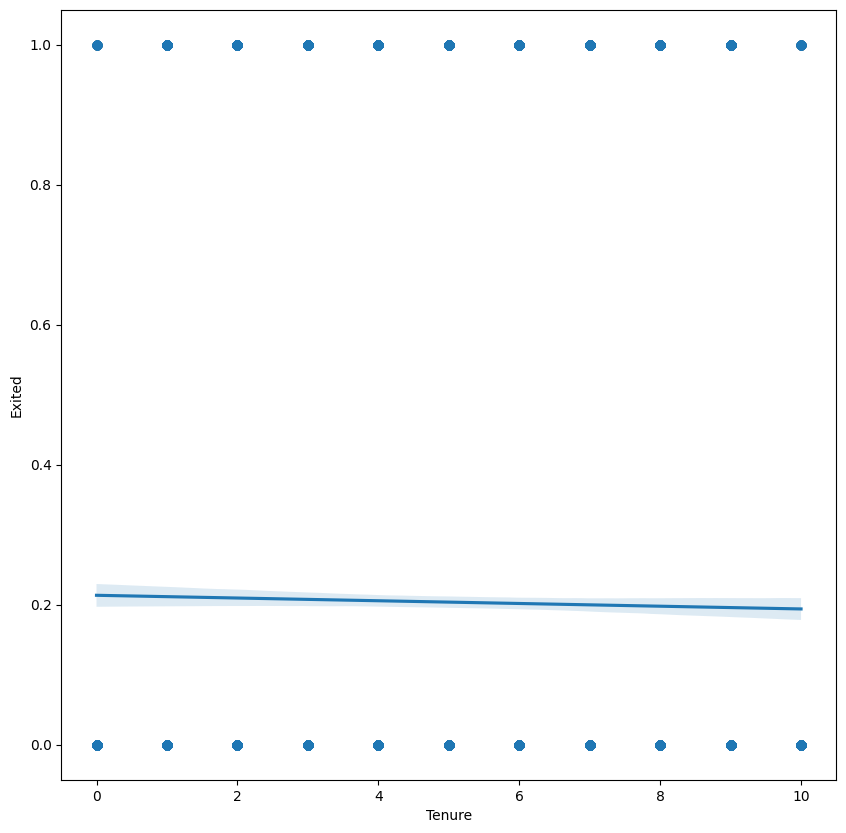

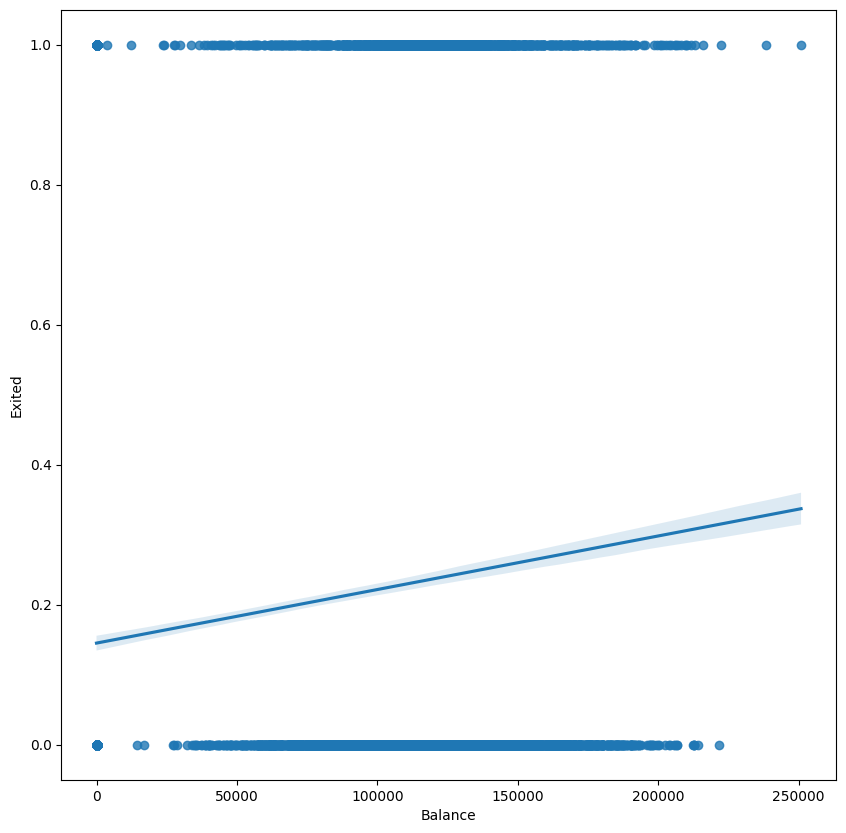

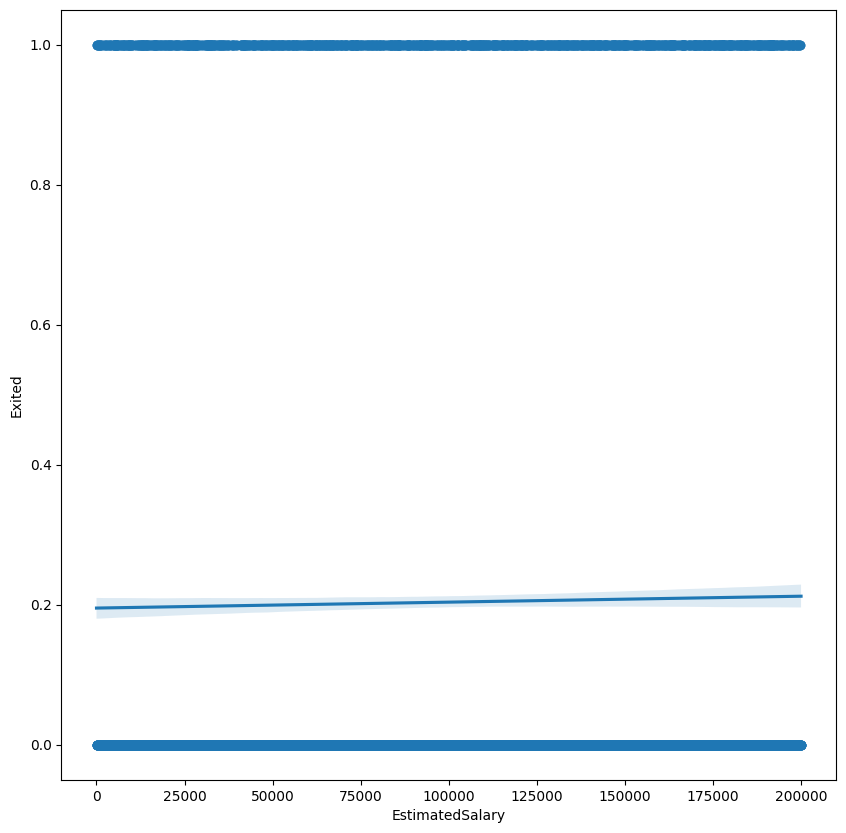

In [59]:
for col in num_cols:
    plt.figure(figsize=(10,10))
    ax = sns.regplot(x=col,y=bank_df['Exited'], data=bank_df);

#### Boolean Independent Variables vs Target Variable

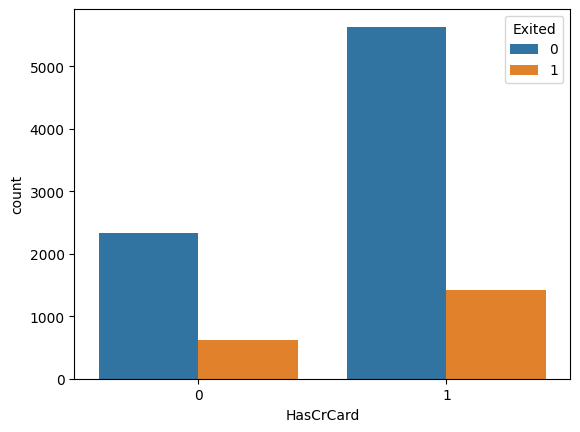

In [62]:
pd.crosstab(bank_df['HasCrCard'],bank_df['Exited'],normalize='index')
sns.countplot(x=bank_df['HasCrCard'], data=bank_df,hue="Exited");

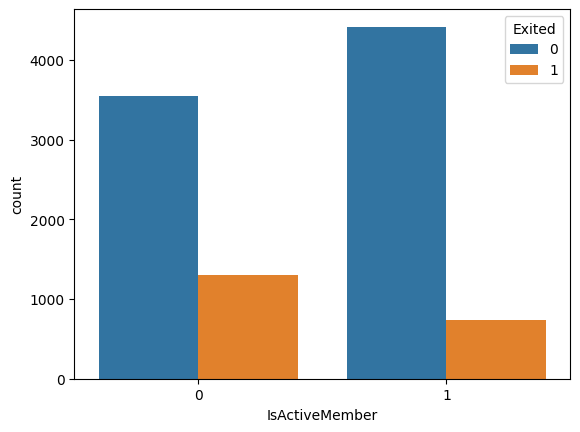

In [61]:
pd.crosstab(bank_df['IsActiveMember'],bank_df['Exited'],normalize='index')
sns.countplot(x=bank_df['IsActiveMember'], data=bank_df,hue="Exited");

### Multivariate analysis

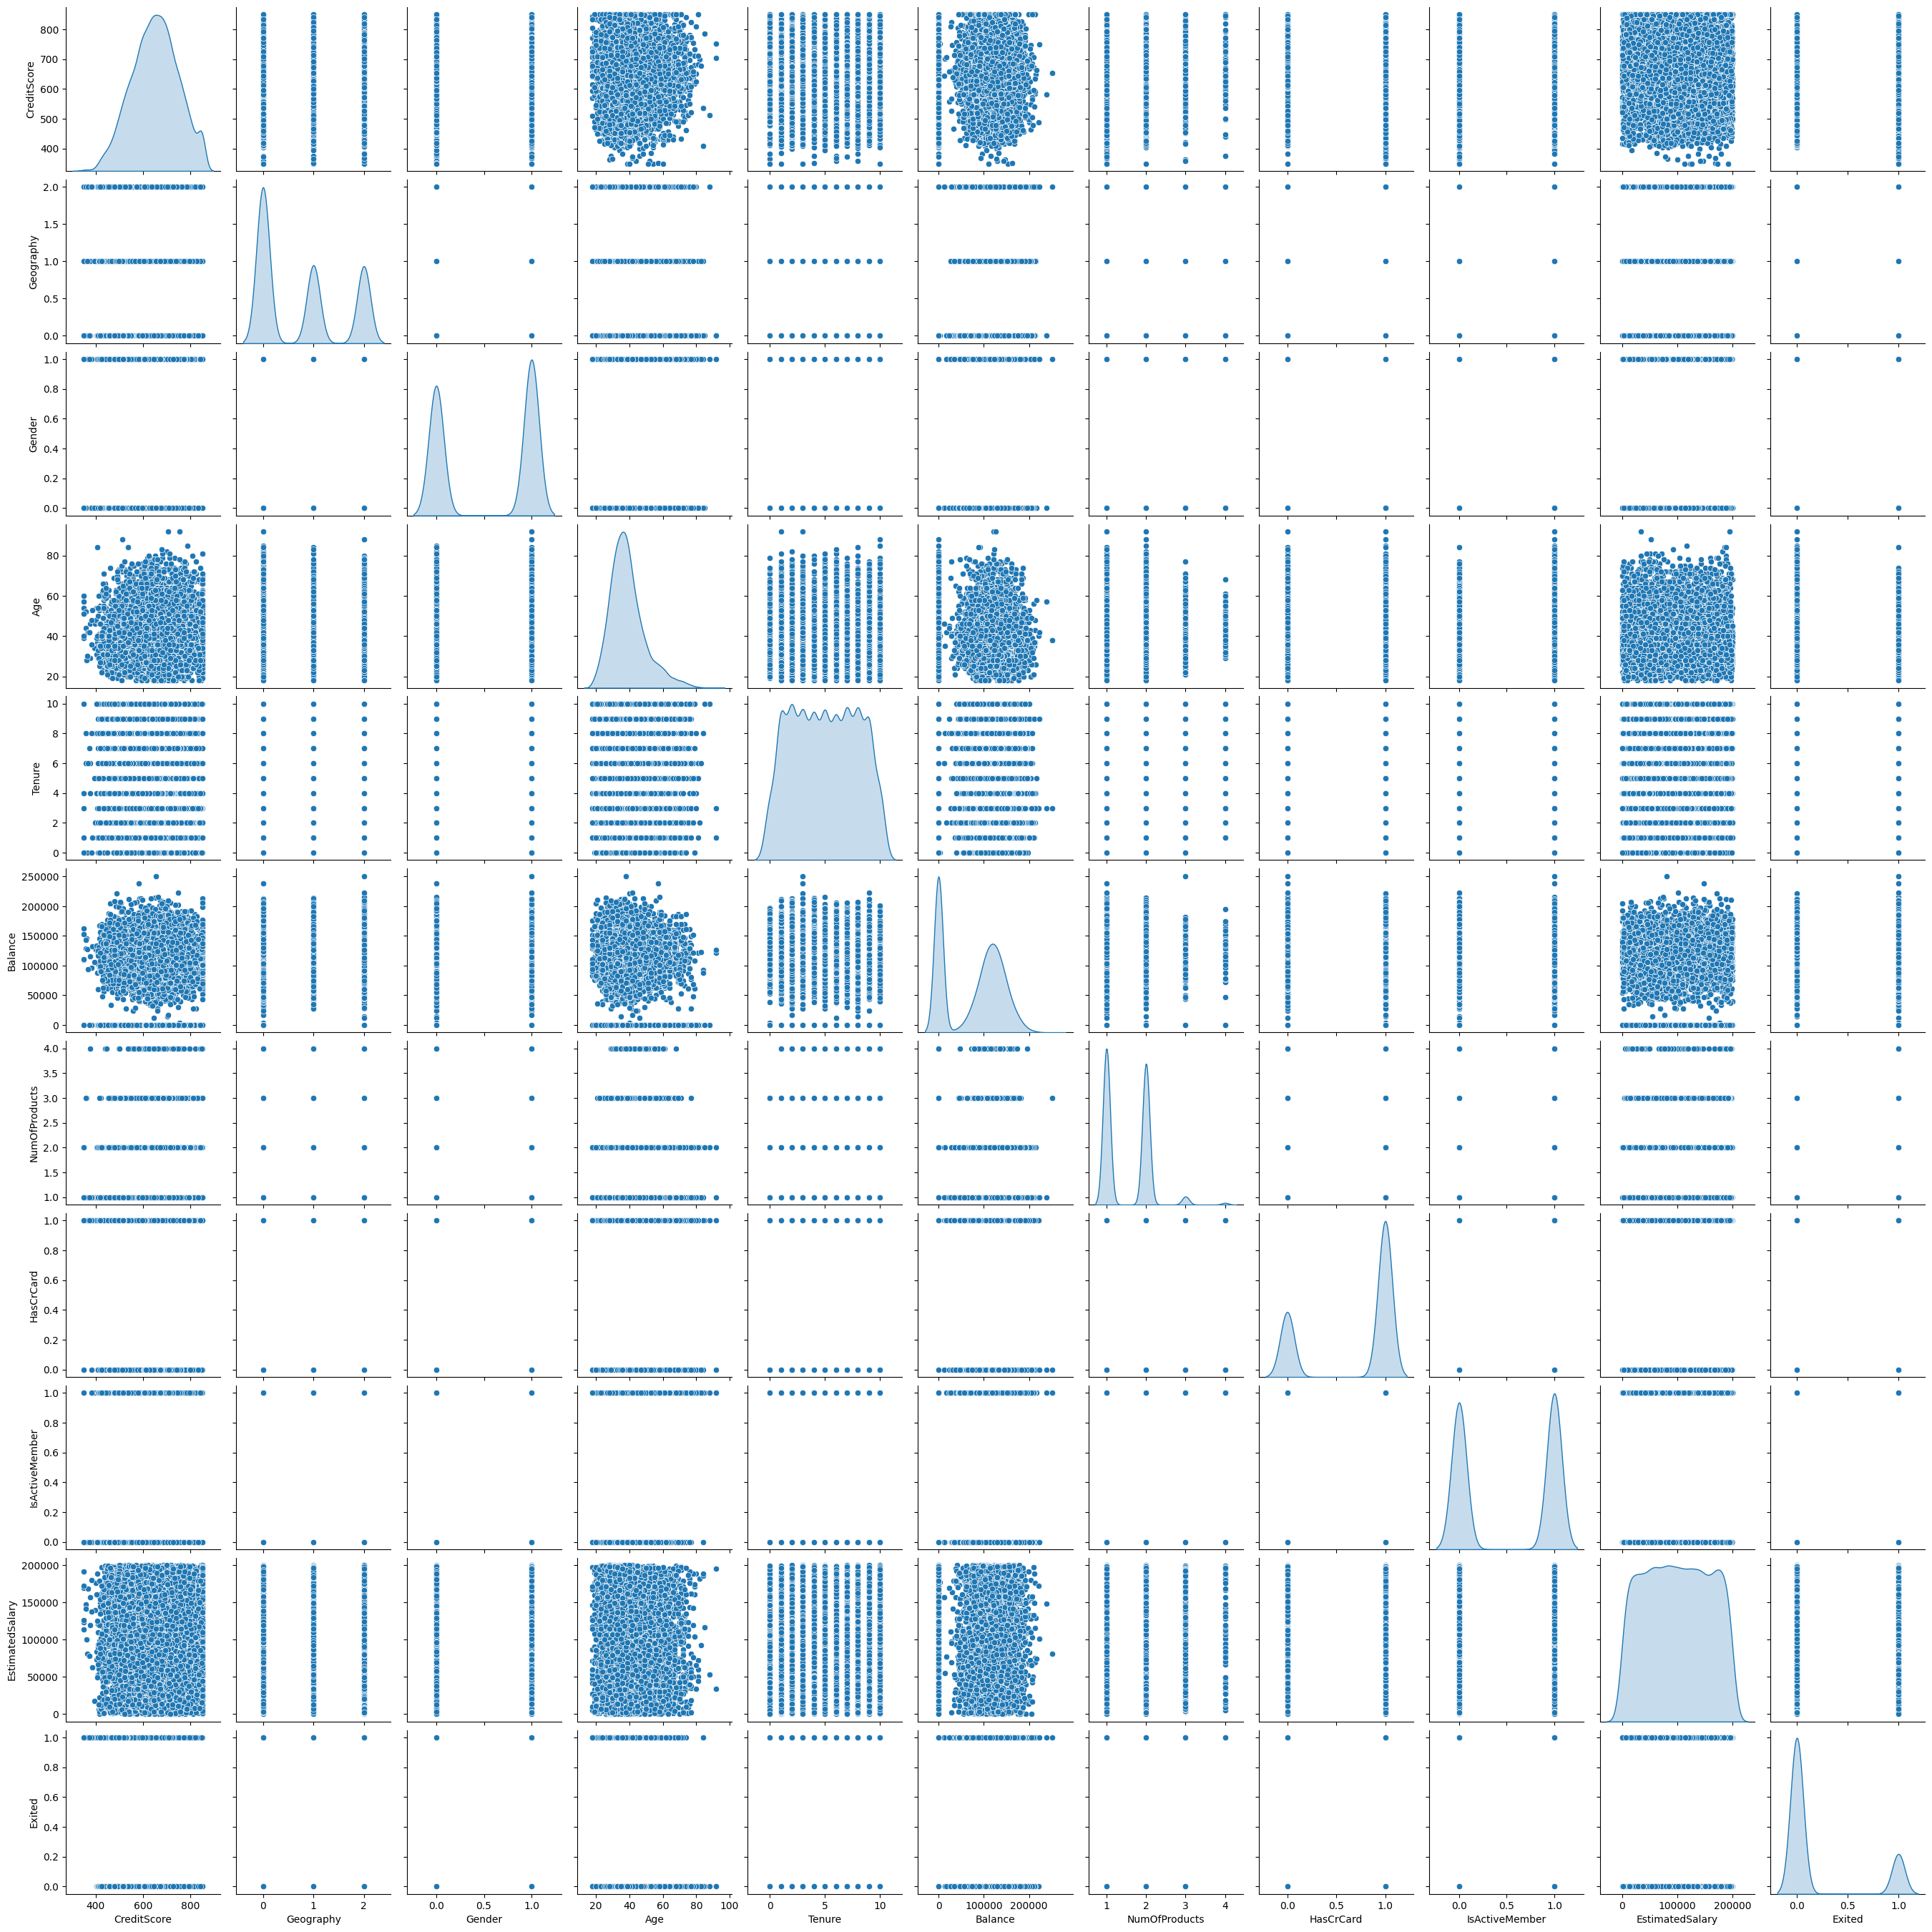

In [64]:
sns.pairplot(data = bank_df,diag_kind ='kde');

In [65]:
# Correlation matrix
corr = bank_df.corr()
corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


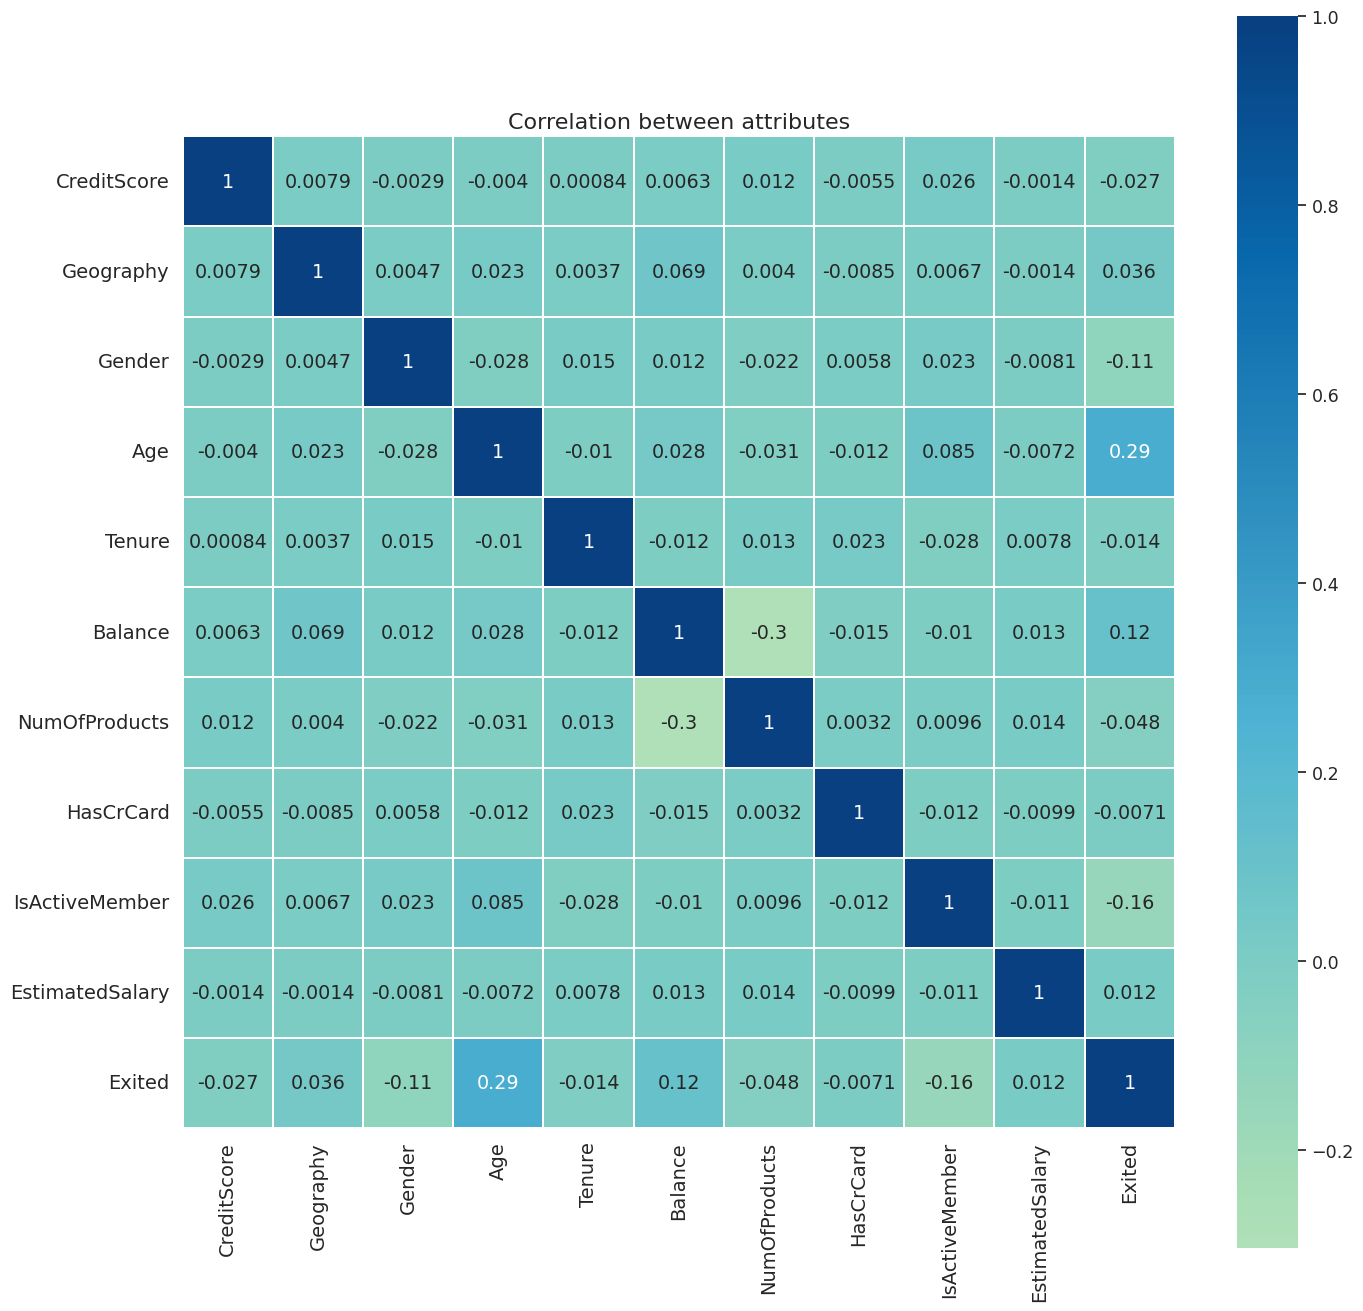

In [66]:
# Heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(16,16))
sns.heatmap(corr, cmap='GnBu',annot=True,linewidths=0.01,center=0,linecolor='white',square=True)
plt.title('Correlation between attributes',fontsize=16)
ax.tick_params(labelsize=14)

### Model Building

In [67]:
## Define X and Y variables
X = bank_df.drop('Exited', axis=1)
Y = bank_df[['Exited']]

In [68]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


### Split into training and test set

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=100)

### Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
# ImportTensorflow Keras library and packages

import sys
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

In [72]:
# Initialising the ANN - Defining as a sequence of layers or a Graph
classifier = Sequential()

In [73]:
# Input Layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
#classifier.add(Dropout(0.1))

In [74]:
# Second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(0.1))

In [75]:
# Output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [76]:
# Compiling the ANN
classifier.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [77]:
# Fitting the ANN to the Training Set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4998 - accuracy: 0.7961
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4331 - accuracy: 0.7969
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4292 - accuracy: 0.7969
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.7969
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8115
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8249
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4165 - accuracy: 0.8280
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8299
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4134 - accuracy: 0.8324
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4122 - accura

In [78]:
loss, acc = classifier.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.831
Loss: 0.412


In [79]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


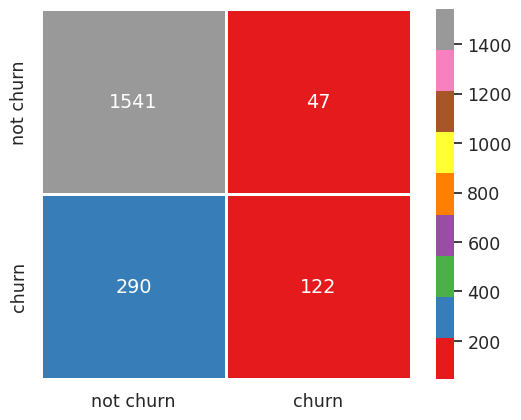

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,fmt = 'd',square = True,
 xticklabels=['not churn','churn'],
 yticklabels=['not churn','churn'],
 linewidths = 2,linecolor = 'w',cmap = 'Set1')
plt.subplots_adjust(wspace = .3,hspace = .3)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1588
           1       0.72      0.30      0.42       412

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



#### The accuracy of the test set is 85%. Hence we can conclude that the model is quite stable and accurate as it had the same amount of accuracy for the test set and training sets.